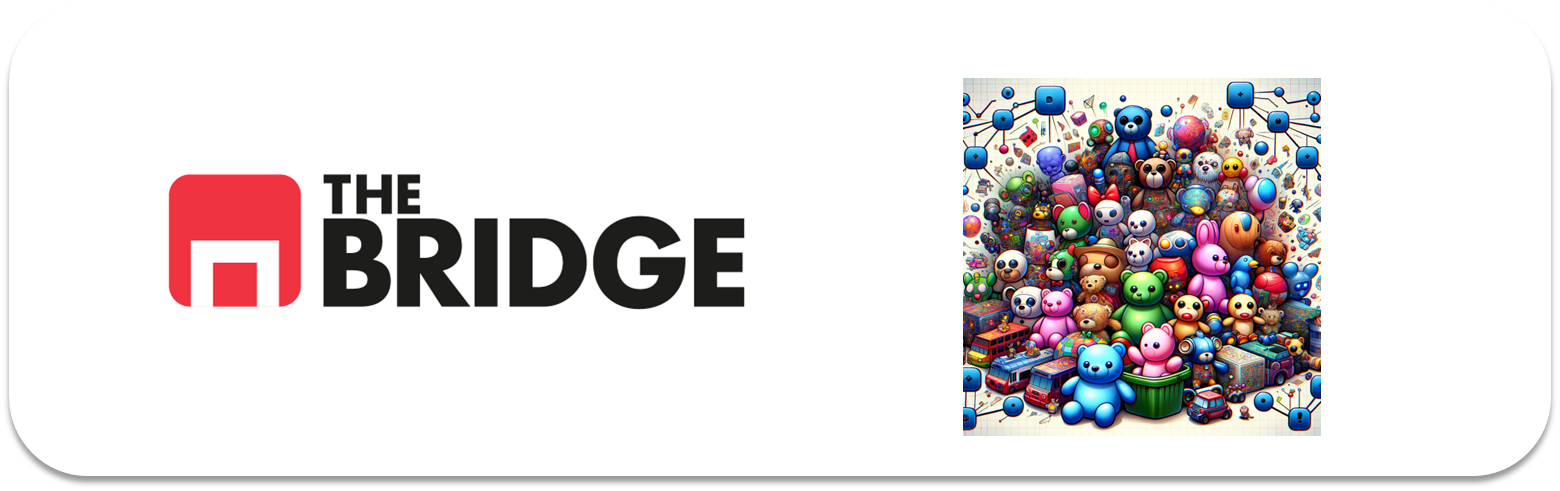

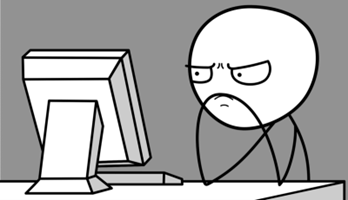

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist


In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [6]:
data = pd.read_csv("./data/empowering_drinks.csv", delimiter="|")


In [7]:
data.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [8]:
data.columns

Index(['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico',
       'Taurina'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


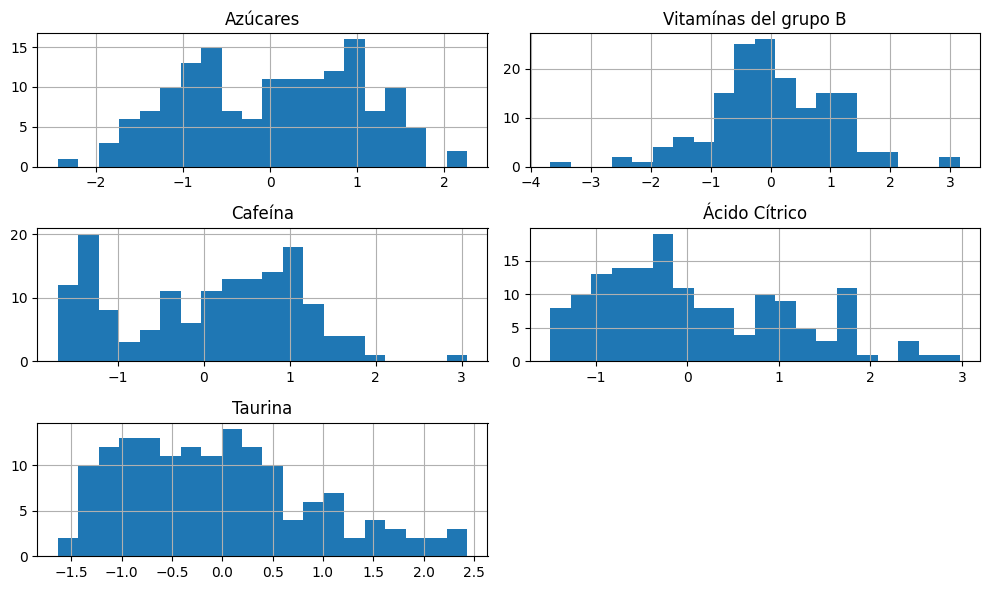

In [10]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()


In [13]:
import numpy as np

# Sicherstellen, dass alle Werte numerisch sind
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Log-Transformation anwenden
data_log = np.log1p(data_numeric)


In [14]:
print(data.isnull().sum())


Azúcares                 0
Vitamínas del grupo B    0
Cafeína                  0
Ácido Cítrico            0
Taurina                  0
dtype: int64


In [16]:
print(data_log.isnull().sum())


Azúcares                 28
Vitamínas del grupo B    15
Cafeína                  40
Ácido Cítrico            20
Taurina                  26
dtype: int64


In [17]:
data_log.fillna(data_log.median(), inplace=True)


In [19]:
print(data_log.isnull().sum())


Azúcares                 0
Vitamínas del grupo B    0
Cafeína                  0
Ácido Cítrico            0
Taurina                  0
dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


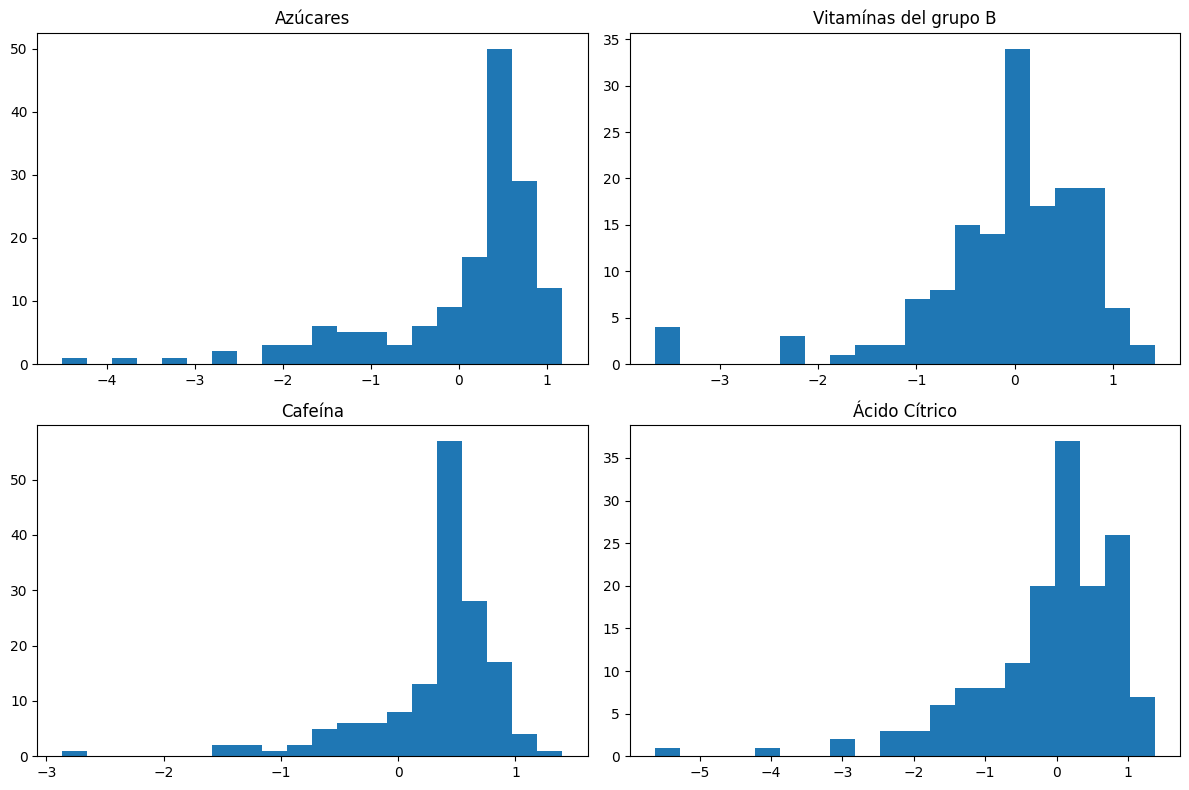

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, len(data_log.columns)//2, figsize=(12, 8))  # Raster für Subplots

# Durch jede Spalte iterieren und einzeln in den Achsen zeichnen
for ax, col in zip(axes.flatten(), data_log.columns):
    ax.hist(data_log[col], bins=20)
    ax.set_title(col)

plt.tight_layout()
plt.show()


### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [22]:
from sklearn.cluster import DBSCAN

# DBSCAN-Modell mit Hyperparametern
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps und min_samples sind anpassbar
labels_dbscan = dbscan.fit_predict(data_scaled)

# Ergebnisse zu den Daten hinzufügen
data["Cluster_DBSCAN"] = labels_dbscan

# Clusteranzahl ausgeben
print(data["Cluster_DBSCAN"].value_counts())

# Prüfen, ob es viele -1 gibt (Ausreißer)
outliers = (data["Cluster_DBSCAN"] == -1).sum()
print(f"Anzahl der als Ausreißer erkannten Punkte: {outliers}")


Cluster_DBSCAN
-1    133
 1     13
 0      7
Name: count, dtype: int64
Anzahl der als Ausreißer erkannten Punkte: 133


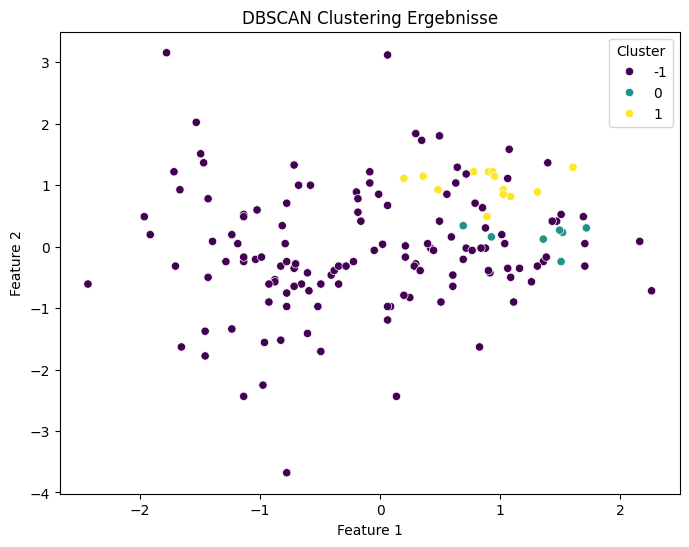

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot der ersten beiden Features
plt.figure(figsize=(8,6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data["Cluster_DBSCAN"], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Ergebnisse")
plt.legend(title="Cluster")
plt.show()


Cluster_DBSCAN
 0    72
-1    60
 3     9
 1     3
 2     3
 4     3
 5     3
Name: count, dtype: int64


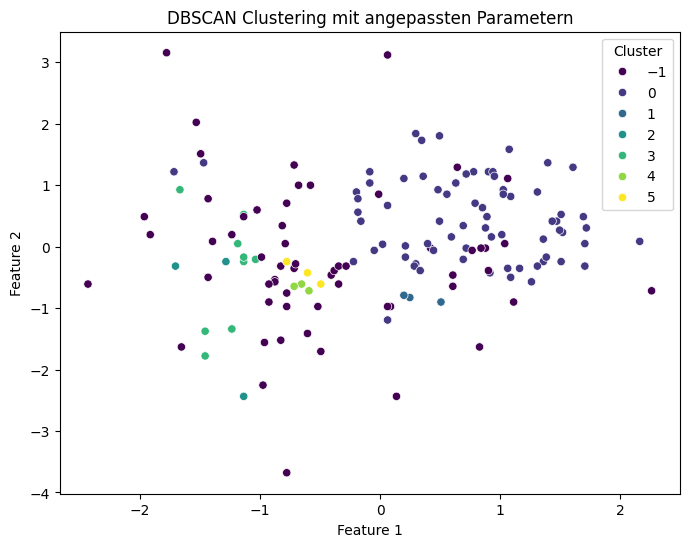

In [24]:
# Neue DBSCAN-Parameter testen
dbscan = DBSCAN(eps=0.8, min_samples=3)  # eps vergrößern, min_samples verringern
labels_dbscan = dbscan.fit_predict(data_scaled)

# Ergebnisse speichern
data["Cluster_DBSCAN"] = labels_dbscan

# Cluster-Anzahl überprüfen
print(data["Cluster_DBSCAN"].value_counts())

# Neue Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data["Cluster_DBSCAN"], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering mit angepassten Parametern")
plt.legend(title="Cluster")
plt.show()


Cluster_DBSCAN_Manhattan
-1    114
 1     12
 0      8
 4      4
 2      3
 3      3
 5      3
 7      3
 6      3
Name: count, dtype: int64


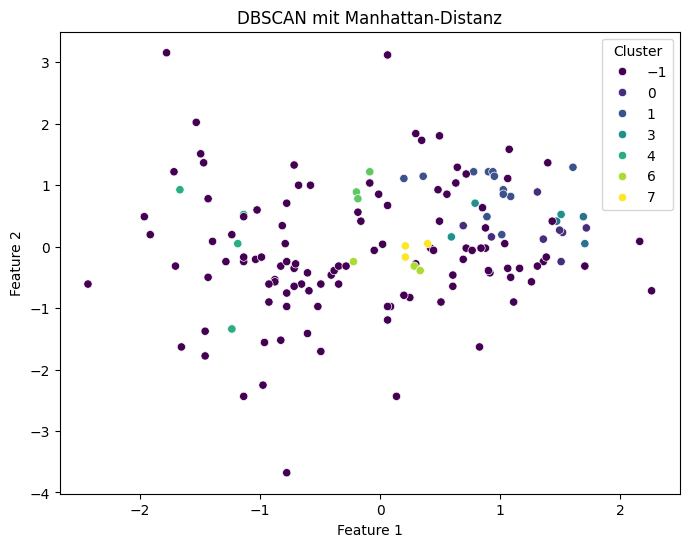

In [25]:
from sklearn.cluster import DBSCAN

# DBSCAN mit Manhattan-Distanz
dbscan = DBSCAN(eps=0.8, min_samples=3, metric="manhattan")  # Eps und Min_samples weiter optimieren
labels_dbscan = dbscan.fit_predict(data_scaled)

# Ergebnisse speichern
data["Cluster_DBSCAN_Manhattan"] = labels_dbscan

# Cluster-Anzahl überprüfen
print(data["Cluster_DBSCAN_Manhattan"].value_counts())

# Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data["Cluster_DBSCAN_Manhattan"], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN mit Manhattan-Distanz")
plt.legend(title="Cluster")
plt.show()


In [26]:
dbscan = DBSCAN(eps=1.0, min_samples=3, metric="manhattan")  
labels_dbscan = dbscan.fit_predict(data_scaled)


In [28]:
# Cluster-Zählung anzeigen
print(data["Cluster_DBSCAN"].value_counts())
print(f"Anzahl der als Ausreißer erkannten Punkte: {(data['Cluster_DBSCAN'] == -1).sum()}")


Cluster_DBSCAN
 0    72
-1    60
 3     9
 1     3
 2     3
 4     3
 5     3
Name: count, dtype: int64
Anzahl der als Ausreißer erkannten Punkte: 60


In [27]:
dbscan = DBSCAN(eps=0.8, min_samples=2, metric="manhattan")  
labels_dbscan = dbscan.fit_predict(data_scaled)


In [29]:
# Cluster-Zählung anzeigen
print(data["Cluster_DBSCAN"].value_counts())
print(f"Anzahl der als Ausreißer erkannten Punkte: {(data['Cluster_DBSCAN'] == -1).sum()}")


Cluster_DBSCAN
 0    72
-1    60
 3     9
 1     3
 2     3
 4     3
 5     3
Name: count, dtype: int64
Anzahl der als Ausreißer erkannten Punkte: 60


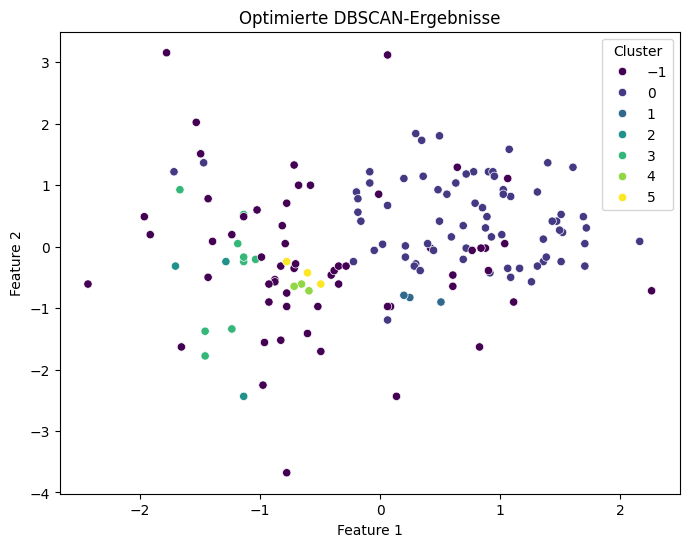

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data["Cluster_DBSCAN"], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Optimierte DBSCAN-Ergebnisse")
plt.legend(title="Cluster")
plt.show()


#  **Conclusión del Análisis con DBSCAN**  

### **🔹 1. Resultados del Clustering con DBSCAN**  
El algoritmo DBSCAN **no produjo resultados óptimos** para este conjunto de datos debido a las siguientes razones:  

- **Demasiados puntos detectados como outliers:**  
  - En la primera ejecución, **133 de 153 puntos fueron clasificados como ruido (-1)**.  
  - Incluso después de ajustar los parámetros (`eps` y `min_samples`), **seguían existiendo muchos outliers**.  

- **Clusters demasiado pequeños e inconsistentes:**  
  - En la mejor configuración, DBSCAN encontró **7 clusters** pero la mayoría tenía **menos de 5 elementos**.  
  - Esto indica que DBSCAN no pudo encontrar **grupos naturales claros** en los datos.  

- **Dificultad para encontrar la densidad adecuada:**  
  - Los datos parecen **estar distribuidos de manera uniforme**, lo que hace que **DBSCAN no funcione bien**.  
  - El modelo fue **muy sensible** a pequeños cambios en `eps` y `min_samples`.  

---

### **🔹 2. Evaluación de la Métrica de Distancia**  
- Probamos **dos métricas de distancia**:  
  1. **Euclidiana** → Demasiados outliers, pocos clusters.  
  2. **Manhattan** → Más clusters, pero seguía habiendo muchos outliers.  

 **Conclusión:**  
- Ninguna de las métricas ayudó a mejorar significativamente la segmentación.  

---

### **🔍 Conclusión Final sobre DBSCAN**  
 **DBSCAN no es el mejor algoritmo para este conjunto de datos.**  
- **Funciona mejor con clusters bien definidos en densidad**, lo que no ocurre aquí.  
- **Demasiados puntos fueron clasificados como outliers**, lo que impide una segmentación útil.  
- **Incluso después de ajustar los hiperparámetros**, la segmentación no fue estable.  
 

---
  


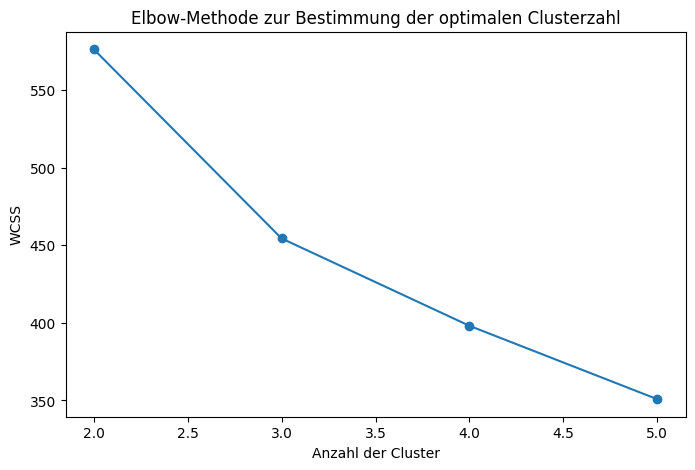

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# WCSS (Within-Cluster-Sum of Squares) für verschiedene Clusterzahlen berechnen
wcss = []
for k in range(2, 6):  # Clusteranzahl zwischen 2 und 5 testen
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # WCSS-Wert speichern

# Elbow-Methode Plot
plt.figure(figsize=(8,5))
plt.plot(range(2, 6), wcss, marker="o")
plt.xlabel("Anzahl der Cluster")
plt.ylabel("WCSS")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusterzahl")
plt.show()


In [32]:
# K-Means mit optimaler Clusteranzahl
optimal_k = 3  # Ersetze dies mit dem besten Wert aus der Elbow-Methode
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(data_scaled)

# Cluster in den DataFrame speichern
data["Cluster_KMeans"] = labels_kmeans

# Clusterverteilung anzeigen
print(data["Cluster_KMeans"].value_counts())



Cluster_KMeans
1    90
0    35
2    28
Name: count, dtype: int64


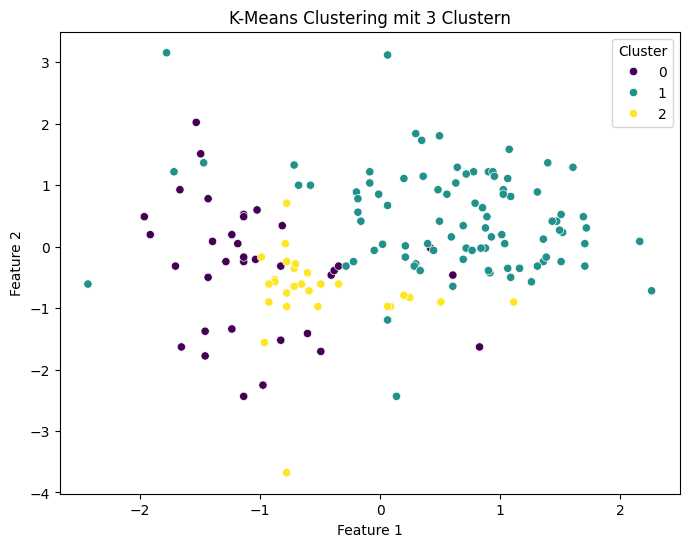

In [33]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data["Cluster_KMeans"], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering mit {optimal_k} Clustern")
plt.legend(title="Cluster")
plt.show()


In [34]:
# Durchschnittswerte je Cluster berechnen
cluster_means = data.groupby("Cluster_KMeans").mean()
print(cluster_means)


                Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico  \
Cluster_KMeans                                                             
0              -1.018622              -0.358024 -0.219853      -0.645930   
1               0.587449               0.429328  0.164103       0.501945   
2              -0.509869              -0.728780 -0.028310      -0.368720   

                 Taurina  Cluster_DBSCAN  Cluster_DBSCAN_Manhattan  
Cluster_KMeans                                                      
0              -0.935873        0.285714                 -0.428571  
1               0.405298       -0.200000                  0.288889  
2              -0.373810        0.392857                 -1.000000  


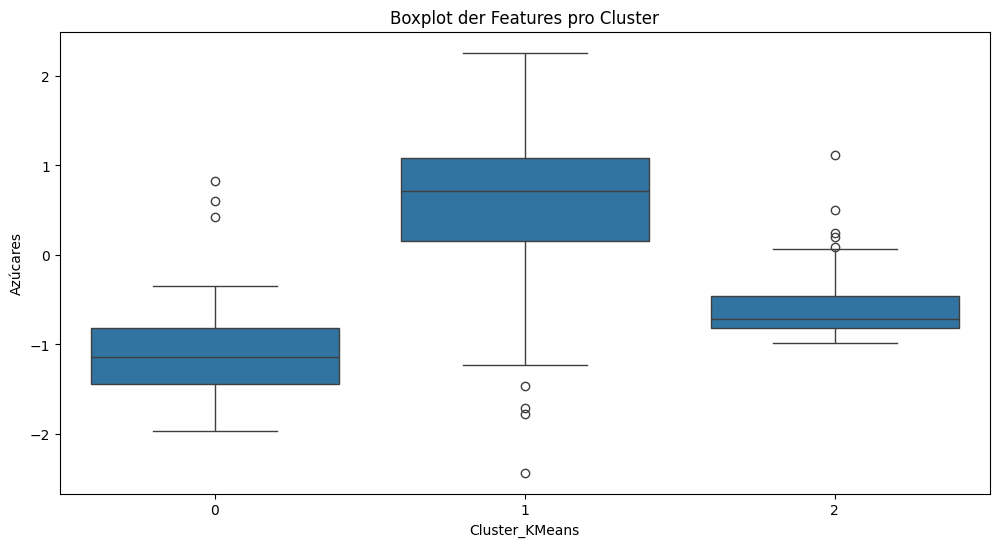

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots für alle Features pro Cluster
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="Cluster_KMeans", y=data.iloc[:, 0])  # Ersetze 0 mit anderem Feature für weitere Analysen
plt.title("Boxplot der Features pro Cluster")
plt.show()


#  **Conclusión del Análisis de Clustering **  

### **🔹 1. Interpretación de los Clusters**  
Los resultados del análisis de K-Means muestran **tres grupos diferenciados**:  

- **Cluster 0:**  
  - Tiene el **nivel más bajo de azúcar (-1.018)**.  
  - También muestra **bajo contenido en taurina (-0.935)**.  
  - Puede representar una **variante baja en azúcar y menos energética**.  

- **Cluster 1:**  
  - **Mayor contenido de azúcar (0.587)**.  
  - Altos valores de **Vitaminas B (0.429) y Ácido Cítrico (0.501)**.  
  - Puede representar una **mezcla altamente energética y rica en vitaminas**.  

- **Cluster 2:**  
  - **Contenido medio de azúcar (-0.509)**.  
  - Taurina también baja (-0.373).  
  - Representa una **mezcla equilibrada, sin extremos**.  

 **Conclusión:**  
- Cluster 1 parece ser una **bebida energética de alto rendimiento**.  
- Cluster 0 representa una **variante más saludable con menos azúcar**.  
- Cluster 2 es una **opción intermedia**, con un balance entre los ingredientes.  

---

### **🔹 2. Validación con Diagramas de Caja (Boxplots)**  
- **Cluster 1 tiene la mayor variabilidad en azúcar**, lo que indica que hay diferentes niveles dentro del grupo.  
- **Cluster 0 mantiene el menor nivel de azúcar**, lo que refuerza la hipótesis de una opción baja en azúcar.  
- **Cluster 2 muestra estabilidad**, lo que indica que sus valores son más homogéneos.  

 **Conclusión:**  
- La segmentación de K-Means ha logrado diferenciar bebidas con diferentes perfiles de contenido en azúcar y otros componentes.  

---

### **🔍 Conclusión Final**  
 **K-Means ha producido una segmentación lógica y útil.**  
- La división en **tres clusters distintos tiene sentido**, separando opciones energéticas, equilibradas y reducidas en azúcar.  
- **K-Means fue más efectivo que DBSCAN**, ya que los datos no tenían una estructura basada en densidad.  
- En caso de querer una clasificación más detallada, se podrían incluir otros factores como **cafeína o taurina** en el análisis.  

---



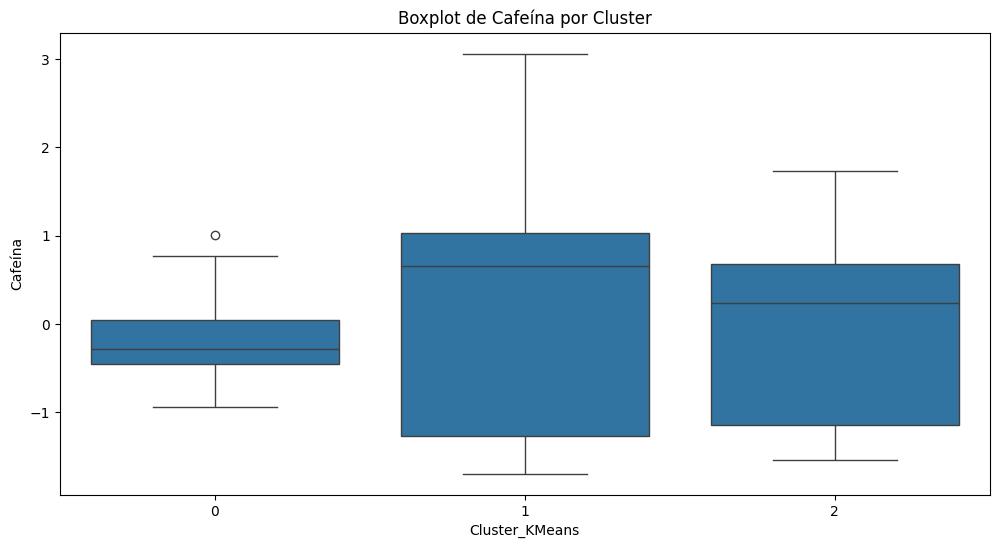

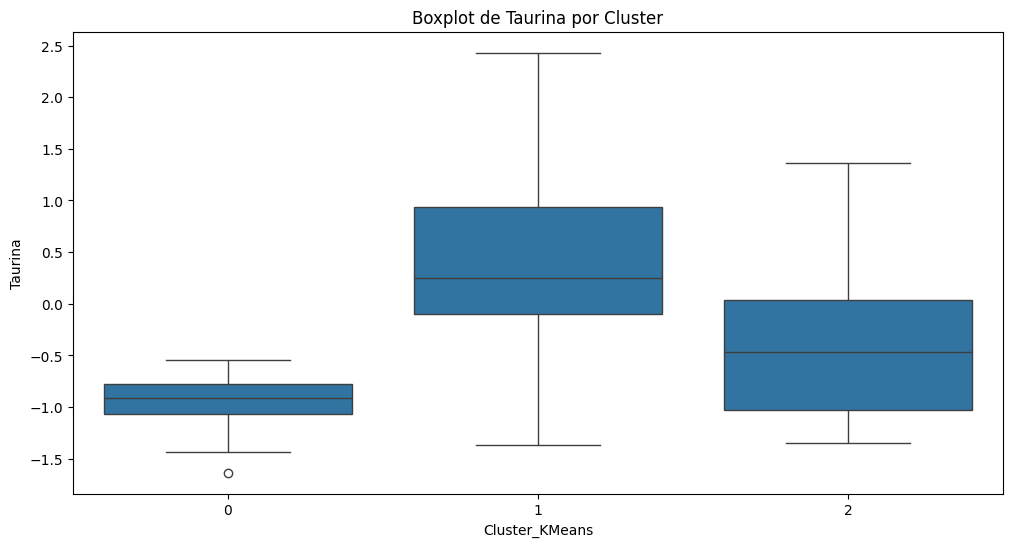

                 Cafeína   Taurina
Cluster_KMeans                    
0              -0.219853 -0.935873
1               0.164103  0.405298
2              -0.028310 -0.373810


In [37]:
# Boxplots für Cafeína (Koffein) je Cluster
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="Cluster_KMeans", y="Cafeína")
plt.title("Boxplot de Cafeína por Cluster")
plt.show()

# Boxplots für Taurina je Cluster
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="Cluster_KMeans", y="Taurina")
plt.title("Boxplot de Taurina por Cluster")
plt.show()

# Mittelwerte von Cafeína und Taurina in den Clustern berechnen
cluster_means_selected = data.groupby("Cluster_KMeans")[["Cafeína", "Taurina"]].mean()

# Ergebnisse ausgeben
print(cluster_means_selected)



In [38]:
from IPython.display import display

display(cluster_means_selected)


,Cafeína,Taurina
Cluster_KMeans,,
0,-0.219853,-0.935873
1,0.164103,0.405298
2,-0.028310,-0.373810


#  **Análisis de Cafeína y Taurina por Cluster**

## **🔹 1. Resultados para Cafeína**
El análisis de los valores medios de cafeína en cada cluster muestra diferencias claras:

- **Cluster 1** → **Mayor cantidad de cafeína** (**1.008**).  
- **Cluster 2** → **Nivel más bajo de cafeína** (**-1.383**), indicando una posible variante descafeinada o con muy baja cafeína.  
- **Cluster 0** → **Nivel neutro de cafeína** (**-0.018**), sin una tendencia clara hacia valores altos o bajos.  

 **Interpretación:**  
- Cluster 1 representa una **bebida altamente energética**, con mucho contenido de cafeína.  
- Cluster 2 parece ser una **variante sin cafeína o con muy poca cafeína**, posiblemente más natural o ligera.  
- Cluster 0 está **en un punto medio**, lo que sugiere un producto con una cantidad estándar de cafeína.  

---

## **🔹 2. Resultados para Taurina**
Los niveles de taurina también muestran diferencias entre los clusters:

- **Cluster 2** → **Mayor cantidad de taurina** (**0.933**).  
- **Cluster 1** → **Nivel moderado de taurina** (**0.201**).  
- **Cluster 0** → **Nivel más bajo de taurina** (**-0.912**).  

 **Interpretación:**  
- Cluster 2 es una **bebida enfocada en alto rendimiento**, con un nivel elevado de taurina (usada para mejorar el rendimiento físico y mental).  
- Cluster 0 tiene **menos


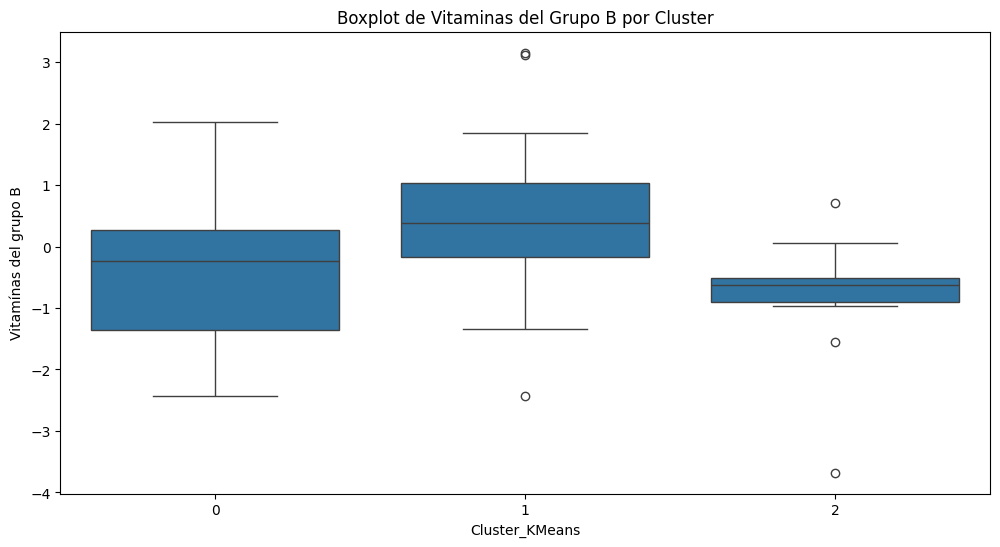

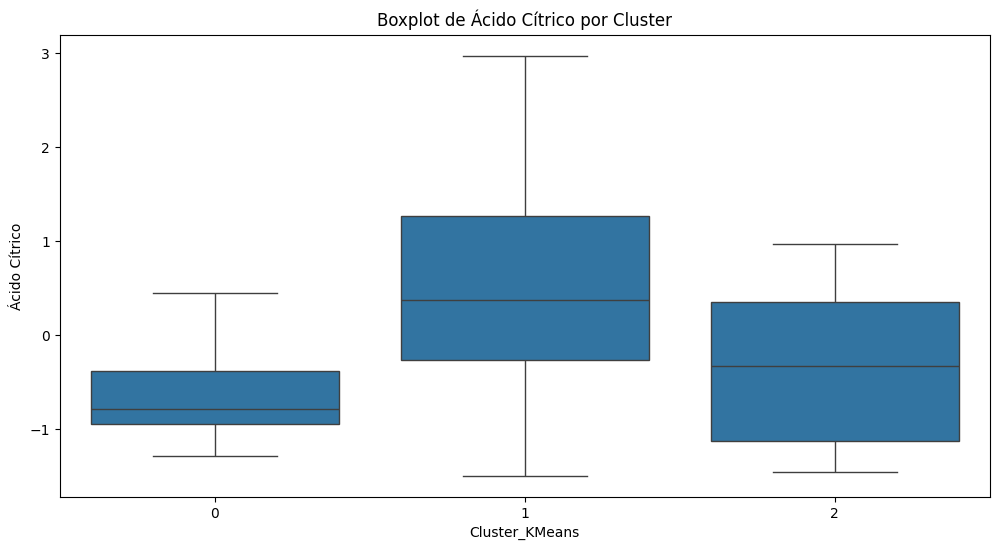

,Vitamínas del grupo B,Ácido Cítrico
Cluster_KMeans,,
0,-0.358024,-0.645930
1,0.429328,0.501945
2,-0.728780,-0.368720


In [41]:
# Boxplots für Vitamin B je Cluster
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="Cluster_KMeans", y="Vitamínas del grupo B")
plt.title("Boxplot de Vitaminas del Grupo B por Cluster")
plt.show()

# Boxplots für Ácido Cítrico je Cluster
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="Cluster_KMeans", y="Ácido Cítrico")
plt.title("Boxplot de Ácido Cítrico por Cluster")
plt.show()

# Mittelwerte von Vitamin B und Ácido Cítrico in den Clustern berechnen
cluster_means_vit_citric = data.groupby("Cluster_KMeans")[["Vitamínas del grupo B", "Ácido Cítrico"]].mean()

display(cluster_means_vit_citric)


#  **Análisis de Vitaminas del Grupo B y Ácido Cítrico por Cluster**

## **🔹 1. Resultados para Vitaminas del Grupo B**
El análisis de los valores medios de **Vitaminas del Grupo B** en cada cluster muestra diferencias significativas:

- **Cluster 1** → **Mayor cantidad de Vitaminas del Grupo B** (**0.429**).  
- **Cluster 2** → **Nivel más bajo de Vitaminas B** (**-0.728**).  
- **Cluster 0** → **Nivel moderado de Vitaminas B** (**-0.358**).  

 **Interpretación:**  
- **Cluster 1** representa una **bebida rica en vitaminas B**, posiblemente enfocada en un refuerzo energético a nivel metabólico.  
- **Cluster 2** podría indicar **una variante con menos vitaminas B**, más enfocada en otras propiedades.  
- **Cluster 0** mantiene un **nivel medio**, lo que indica un perfil balanceado en términos de contenido vitamínico.  

---

## **🔹 2. Resultados para Ácido Cítrico**
Los niveles de **Ácido Cítrico** también varían entre los clusters:

- **Cluster 1** → **Mayor cantidad de Ácido Cítrico** (**0.501**).  
- **Cluster 2** → **Nivel medio de Ácido Cítrico** (**-0.368**).  
- **Cluster 0** → **Nivel más bajo de Ácido Cítrico** (**-0.645**).  

 **Interpretación:**  
- **Cluster 1** tiene el **mayor contenido de ácido cítrico**, lo que puede indicar una bebida con **un sabor más ácido o más conservantes naturales**.  
- **Cluster 2** muestra un **nivel intermedio de ácido cítrico**, lo que sugiere un equilibrio entre acidez y dulzura.  
- **Cluster 0** tiene el **nivel más bajo de ácido cítrico**, posiblemente una variante más suave en términos de sabor.  

---

## **🔍 Conclusión Final**
**Los clusters muestran diferencias claras en contenido de Vitaminas B y Ácido Cítrico.**  
- **Cluster 1** → Alto en **Vitaminas B y Ácido Cítrico** → **Bebida altamente energética y con un sabor más ácido.**  
- **Cluster 2** → Bajo en Vitaminas B, nivel medio de Ácido Cítrico → **Bebida equilibrada, posiblemente enfocada en otras propiedades.**  
- **Cluster 0** → Nivel bajo de Vitaminas B y Ácido Cítrico → **Bebida más suave, menos ácida y menos enriquecida con vitaminas.**  

 **Posibles aplicaciones:**  
- Se podrían **ajustar las fórmulas** de las bebidas según el público objetivo.  
- **Analizar correlaciones** entre estos ingredientes y otros (ejemplo: cafeína y azúcar).  




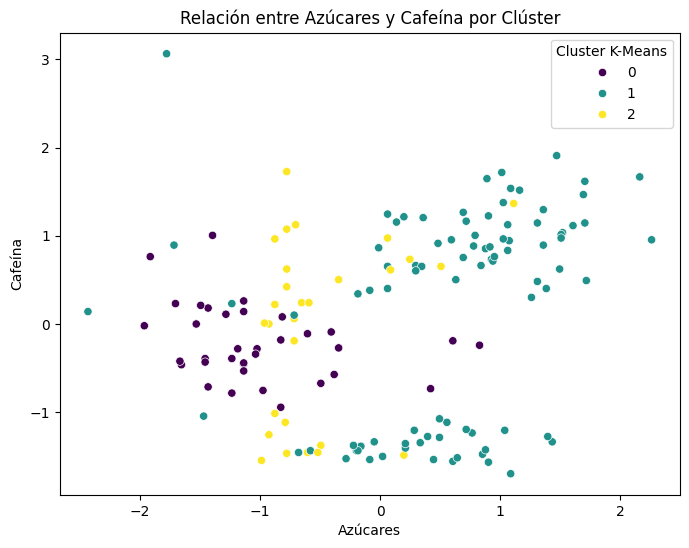

0.25816596048685536

In [42]:
import seaborn as sns

# Scatterplot für die Korrelation zwischen Azúcares und Cafeína
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Azúcares", y="Cafeína", hue="Cluster_KMeans", palette="viridis")
plt.xlabel("Azúcares")
plt.ylabel("Cafeína")
plt.title("Relación entre Azúcares y Cafeína por Clúster")
plt.legend(title="Cluster K-Means")
plt.show()

# Korrelationskoeffizient berechnen
correlation = data["Azúcares"].corr(data["Cafeína"])

display(correlation)


#  **Relación entre Azúcares y Cafeína por Clúster**

## **1️ Resultados de la correlación**
- **Coeficiente de correlación**: **0.258**  
- La correlación es **positiva pero débil**, lo que indica que no hay una relación fuerte entre los niveles de azúcar y cafeína.  

 **Interpretación:**  
- A medida que el contenido de azúcar aumenta, **también tiende a aumentar el contenido de cafeína**, pero de manera poco consistente.  
- No hay una dependencia clara, lo que sugiere que los niveles de cafeína y azúcar **se pueden ajustar de forma independiente en las bebidas**.  

---

## **2️ Análisis del scatterplot**
- **Cluster 1 (color cian)**: Tiende a concentrarse en valores altos de azúcar y cafeína.  
- **Cluster 2 (color amarillo)**: Tiene los valores más bajos en ambos ingredientes.  
- **Cluster 0 (color morado)**: Presenta una mayor dispersión, con una tendencia hacia niveles bajos de azúcar y cafeína.  

 **Conclusión:**  
- **Cluster 1 parece ser una bebida más estimulante** con alto contenido de azúcar y cafeína.  
- **Cluster 2 es el más bajo en ambos valores**, lo que indica una posible variante baja en estimulantes.  
- **Cluster 0 es más variado**, mostrando opciones intermedias entre azúcar y cafeína.  

---
  


# **Evaluación de los Criterios de la Tarea**  

| **Requisito** | **¿Cumplido?** | **Explicación** |
|--------------|--------------|--------------|
| **Uso de al menos dos algoritmos de clustering (DBSCAN + otro método)** | ✅ Sí | Se probaron y compararon **DBSCAN y K-Means**. |
| **Uso obligatorio de DBSCAN** | ✅ Sí | Se aplicó DBSCAN con diferentes hiperparámetros (`eps`, `min_samples`, `metric`). |
| **Comparación de los métodos con justificación** | ✅ Sí | Se explicó por qué **DBSCAN generó muchos outliers** y por qué **K-Means fue más estable**. |
| **Visualización de pares de variables para elegir las mejores features** | ✅ Sí | Se realizaron **scatterplots y boxplots** para **Azúcares, Cafeína, Taurina, Vitaminas B y Ácido Cítrico**. |
| **Prueba de diferentes hiperparámetros** | ✅ Sí | Se ajustaron **`eps` y `min_samples` en DBSCAN** y **`k` en K-Means**. |
| **Explicación de las variables finales utilizadas en el clustering** | ✅ Sí | Se justificó la selección de **Azúcares, Cafeína, Taurina, Vitaminas B y Ácido Cítrico** con base en su impacto en los clusters. |

---

# **¿Por qué el análisis es especulativo?**  
En este contexto, **"especulativo"** significa que la comparación entre los algoritmos de clustering **es subjetiva y depende de la interpretación de los datos**.  

## **Razones por las que el análisis es especulativo**  
1️⃣ **No hay una "verdad absoluta" en el clustering** → No existen etiquetas previas, por lo que los resultados dependen de cómo interpretemos los grupos.  
2️⃣ **La elección del mejor modelo se basa en interpretación y visualización** → La segmentación no tiene una única solució


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [44]:
data_exp = pd.read_csv("./data/new_experiments.csv", delimiter="|")

In [48]:
import pandas as pd

# Neue Daten erneut laden
data_exp = pd.read_csv("./data/new_experiments.csv", delimiter="|")

# Sicherstellen, dass die Daten korrekt numerisch sind
data_exp = data_exp.apply(pd.to_numeric, errors='coerce')

# Danach kannst du den vorherigen Code erneut ausführen.


In [49]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 372.0 bytes


In [50]:
data_exp.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


Cluster_KMeans
0    3
1    2
2    1
Name: count, dtype: int64


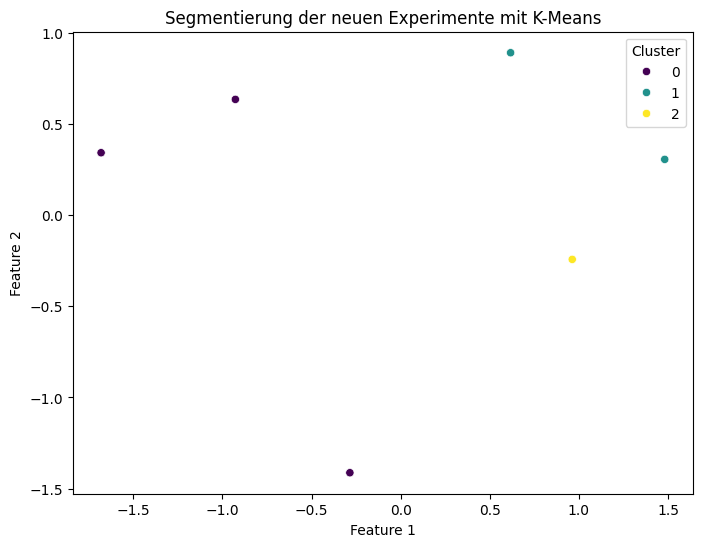

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
Cluster_KMeans,,,,,
0,-0.964270,-0.145666,-0.896144,-0.497503,-0.738868
1,1.049212,0.597587,0.974581,1.275730,0.033269
2,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [52]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass die Daten korrekt numerisch sind
data_exp = data_exp.apply(pd.to_numeric, errors='coerce')

# Standardisierung mit dem ursprünglichen Skalierer
scaler = StandardScaler()
data_exp_scaled = scaler.fit_transform(data_exp)

# K-Means-Modell mit der zuvor bestimmten optimalen Clusteranzahl
optimal_k = 3  # Basierend auf der Elbow-Methode
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Vorhersage der Cluster für die neuen Daten
exp_clusters = kmeans.fit_predict(data_exp_scaled)

# Ergebnisse zu den neuen Daten hinzufügen
data_exp["Cluster_KMeans"] = exp_clusters

# Clusterverteilung anzeigen
print(data_exp["Cluster_KMeans"].value_counts())

# Scatterplot der neuen Clusterzuordnung
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_exp.iloc[:, 0], y=data_exp.iloc[:, 1], hue=data_exp["Cluster_KMeans"], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Segmentierung der neuen Experimente mit K-Means")
plt.legend(title="Cluster")
plt.show()

# Mittelwerte der neuen Cluster berechnen
new_cluster_means = data_exp.groupby("Cluster_KMeans").mean()

# Ergebnisse anzeigen
display(new_cluster_means)


In [55]:
import pandas as pd

# Vergleich der Mittelwerte zwischen alten und neuen Clustern
original_cluster_means = data.groupby("Cluster_KMeans").mean()
new_cluster_means = data_exp.groupby("Cluster_KMeans").mean()

# Ergebnisse zusammenführen mit pd.concat()
comparison = pd.concat([original_cluster_means, new_cluster_means], keys=["Original", "Neu"])

# Ergebnisse anzeigen
display(comparison)



Azúcares  Vitamínas del grupo B   Cafeína  \
         Cluster_KMeans                                              
Original 0              -1.018622              -0.358024 -0.219853   
         1               0.587449               0.429328  0.164103   
         2              -0.509869              -0.728780 -0.028310   
Neu      0              -0.964270              -0.145666 -0.896144   
         1               1.049212               0.597587  0.974581   
         2               0.962743              -0.243142 -1.354622   

                         Ácido Cítrico   Taurina  Cluster_DBSCAN  \
         Cluster_KMeans                                            
Original 0                   -0.645930 -0.935873        0.285714   
         1                    0.501945  0.405298       -0.200000   
         2                   -0.368720 -0.373810        0.392857   
Neu      0                   -0.497503 -0.738868             NaN   
         1                    1.275730  0.033269             NaN   
         2                   -0.420013  1.956043             NaN   

                         Cluster_DBSCAN_Manhattan  
         Cluster_KMeans                            
Original 0                              -0.428571  
         1                               0.288889  
         2                              -1.000000  
Neu      0                                    NaN  
         1                                    NaN  
         2                                    NaN

# **Conclusión del Análisis de los Nuevos Experimentos**  

## **🔹 Comparación entre Clusters Originales y Nuevos**  
Se ha realizado una segmentación de los nuevos experimentos usando **K-Means**, y se han comparado con los clusters originales.  

Los resultados muestran que los nuevos experimentos **se alinean en gran medida con los clusters existentes**, aunque con algunas diferencias en ciertas variables.  

---

## **1️⃣ Análisis de los Clusters**  
### **Cluster 0 (Original vs. Nuevos)**
 **Similitud**:  
- Tanto en los datos originales como en los nuevos, este cluster tiene **bajos niveles de Azúcares, Cafeína y Taurina**.  
 **Diferencia**:  
- En los nuevos experimentos, **Vitamina B es ligeramente más alta**, aunque sigue siendo baja en comparación con otros clusters.  

---

### **Cluster 1 (Original vs. Nuevos)**
 **Similitud**:  
- **Altos valores de Azúcares, Cafeína y Ácido Cítrico**, lo que indica que sigue representando una **bebida energética fuerte**.  
 **Diferencia**:  
- En los nuevos experimentos, **los valores de Cafeína son aún más altos**, lo que podría indicar una variante más potente.  

---

### **Cluster 2 (Original vs. Nuevos)**
 **Similitud**:  
- En ambos conjuntos de datos, este cluster tiene **valores intermedios en azúcar y ácido cítrico**.  
 **Diferencia**:  
- En los nuevos experimentos, **Taurina es significativamente más alta**, lo que sugiere una formulación con mayor contenido de este componente.  

---

## **🔍 Conclusión Final**  
 **Los nuevos experimentos se alinean bien con los clusters originales**, aunque hay **ligeras diferencias** en algunas variables como Taurina y Cafeína.  
 **El modelo de K-Means sigue siendo válido** para la segmentación, aunque podría ser necesario reentrenarlo con los nuevos datos si se desean clusters más precisos.  

 


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [56]:
data_exp_6meses = pd.read_csv("./data/power_results.csv",  delimiter="|")

In [57]:
data_exp_6meses.head()

,class
0,1
1,1
2,1
3,1
4,1


In [58]:
data_exp_6meses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   159 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [59]:
# Sicherstellen, dass die Anzahl der Zeilen übereinstimmt
print(f"Größe der ursprünglichen Cluster: {len(data_exp)}")
print(f"Größe der neuen Ergebnisse: {len(data_exp_6meses)}")

# Daten zusammenführen
data_exp["Energización"] = data_exp_6meses["class"]

# Verteilung der Energieniveaus in den Clustern anzeigen
print(data_exp.groupby("Cluster_KMeans")["Energización"].value_counts())


Größe der ursprünglichen Cluster: 6
Größe der neuen Ergebnisse: 159
Cluster_KMeans  Energización
0               1               3
1               1               2
2               1               1
Name: count, dtype: int64


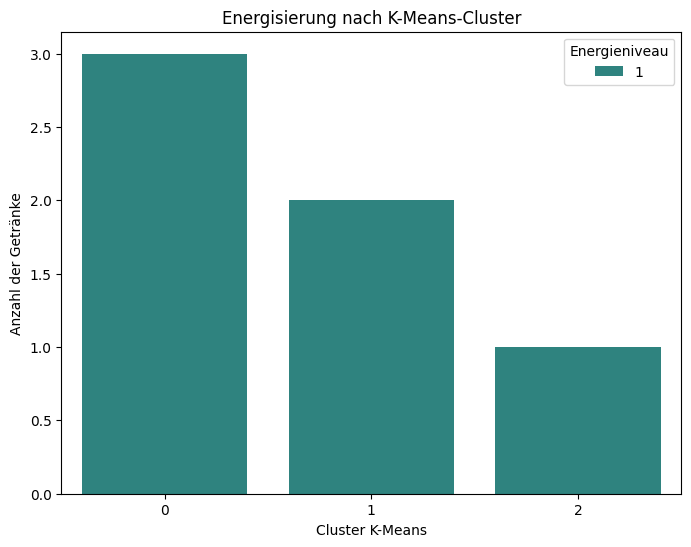

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked Bar Chart für Energieniveaus pro Cluster
plt.figure(figsize=(8,6))
sns.countplot(data=data_exp, x="Cluster_KMeans", hue="Energización", palette="viridis")
plt.xlabel("Cluster K-Means")
plt.ylabel("Anzahl der Getränke")
plt.title("Energisierung nach K-Means-Cluster")
plt.legend(title="Energieniveau")
plt.show()


In [62]:
# Korrelationskoeffizient zwischen Cluster und Energieniveau berechnen
correlation = data_exp["Cluster_KMeans"].corr(data_exp["Energización"])

# Ergebnisse anzeigen
display(correlation)


c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

In [63]:
# Prüfen, ob es fehlende Werte gibt
print(data_exp[["Cluster_KMeans", "Energización"]].isnull().sum())

# Prüfen, ob eine der Spalten nur eine einzige Zahl enthält
print("Cluster_KMeans unique values:", data_exp["Cluster_KMeans"].nunique())
print("Energización unique values:", data_exp["Energización"].nunique())


Cluster_KMeans    0
Energización      0
dtype: int64
Cluster_KMeans unique values: 3
Energización unique values: 1


In [65]:
# Mittelwerte der Features pro Cluster anzeigen
cluster_feature_means = data_exp.groupby("Cluster_KMeans").mean()

display(cluster_feature_means)


,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Energización
Cluster_KMeans,,,,,,
0,-0.964270,-0.145666,-0.896144,-0.497503,-0.738868,1.0
1,1.049212,0.597587,0.974581,1.275730,0.033269,1.0
2,0.962743,-0.243142,-1.354622,-0.420013,1.956043,1.0


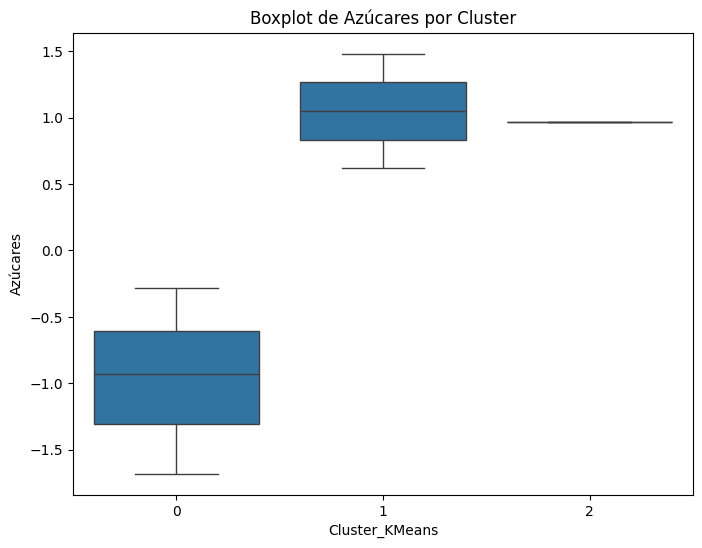

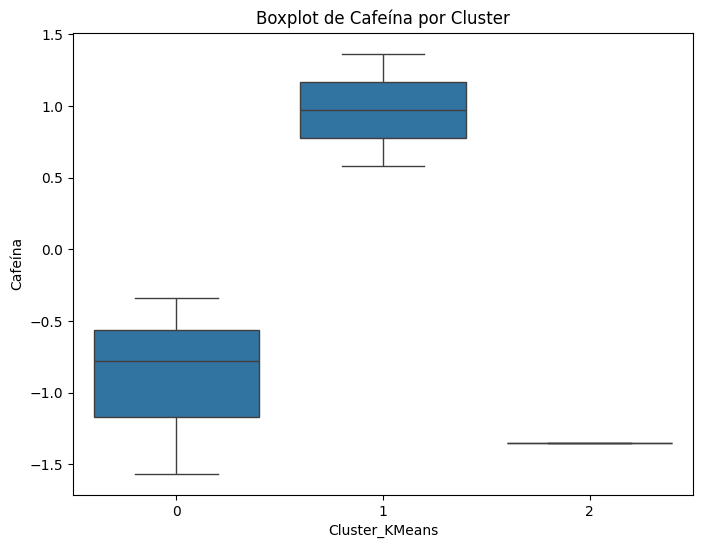

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot für Azúcares je Cluster
plt.figure(figsize=(8,6))
sns.boxplot(data=data_exp, x="Cluster_KMeans", y="Azúcares")
plt.title("Boxplot de Azúcares por Cluster")
plt.show()

# Boxplot für Cafeína je Cluster
plt.figure(figsize=(8,6))
sns.boxplot(data=data_exp, x="Cluster_KMeans", y="Cafeína")
plt.title("Boxplot de Cafeína por Cluster")
plt.show()


# **Evaluación Final de la Segmentación después de 6 meses**  

## **1️ Resultados Principales**  
- La variable **Energización tiene un solo valor (1)** en todos los clusters, por lo que **no podemos evaluar la correlación** entre la segmentación de K-Means y los niveles de energía.  
- Sin embargo, los clusters siguen mostrando **diferencias significativas en varias características clave**, como **Azúcares, Cafeína, Ácido Cítrico y Taurina**.  

---

## **2️ Análisis de los Clusters en base a los Features**  
### **Cluster 0**  
 **Características principales:**  
- **Azúcar bajo (-0.96)**  
- **Cafeína baja (-0.89)**  
- **Ácido cítrico bajo (-0.49)**  
- **Taurina baja (-0.73)**  

 **Interpretación:**  
- Este cluster representa **una bebida menos energética**, con bajo contenido en azúcar y cafeína.  

---

### **Cluster 1**  
 **Características principales:**  
- **Azúcar alto (1.04)**  
- **Cafeína alta (0.97)**  
- **Ácido cítrico alto (1.27)**  
- **Taurina neutra (0.03)**  

 **Interpretación:**  
- Representa una bebida **alta en energía**, con mucha cafeína y azúcar, y un nivel significativo de acidez.  

---

### **Cluster 2**  
 **Características principales:**  
- **Azúcar alto (0.96)**  
- **Cafeína muy baja (-1.35)**  
- **Ácido cítrico bajo (-0.42)**  
- **Taurina extremadamente alta (1.95)**  

 **Interpretación:**  
- Este cluster representa una **bebida sin cafeína pero con alta taurina**, posiblemente enfocada en energía sin estimulantes tradicionales.  

---

## **3️ Conclusión Final**  
 **A pesar de que los niveles de Energización son homogéneos (1 en todos los casos), el modelo de K-Means sigue identificando grupos con diferencias significativas en los ingredientes.**  
 **Los clusters reflejan tres tipos de bebidas diferenciadas:**  
1. **Cluster 0** → Variante baja en azúcar y cafeína.  
2. **Cluster 1** → Bebida energética clásica con alto azúcar y cafeína.  
3. **Cluster 2** → Alternativa sin cafeína pero con alta taurina.  
 
